In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
heart = pd.read_csv('../data/raw/heart-disease-dataset.csv')
heart

,age,sex,chest_pain_type,resting_bp_s,cholesterol,fasting_blood_sugar,resting_ecg,max_heart_rate,exercise_angina,oldpeak,st_slope,target
0,40.0,1.0,2.0,140.0,289.0,0.0,0.0,172.0,0.0,0.0,1.0,0.0
1,49.0,0.0,3.0,160.0,180.0,0.0,0.0,156.0,0.0,1.0,2.0,1.0
2,37.0,1.0,2.0,130.0,283.0,0.0,1.0,98.0,0.0,0.0,1.0,0.0
3,48.0,0.0,4.0,138.0,214.0,0.0,0.0,108.0,1.0,1.5,2.0,1.0
4,54.0,1.0,3.0,150.0,195.0,0.0,0.0,122.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1185,45.0,1.0,1.0,110.0,264.0,0.0,0.0,132.0,0.0,1.2,2.0,1.0
1186,68.0,1.0,4.0,144.0,193.0,1.0,0.0,141.0,0.0,3.4,2.0,1.0
1187,57.0,1.0,4.0,130.0,131.0,0.0,0.0,115.0,1.0,1.2,2.0,1.0
1188,57.0,0.0,2.0,130.0,236.0,0.0,2.0,174.0,0.0,0.0,2.0,1.0


In [13]:
for col in heart.columns:
    print(heart[col].unique())

[40. 49. 37. 48. 54. 39. 45. 58. 42. 38. 43. 60. 36. 44. 53. 52. 51. 56.
 41. 32. 65. 35. 59. 50. 47. 31. 46. 57. 55. 63. 66. 34. 33. 61. 29. 62.
 28. 30. 74. 68. 72. 64. 69. 67. 73. 70. 77. 75. 76. 71.]
[1. 0.]
[2. 3. 4. 1.]
[140. 160. 130. 138. 150. 120. 110. 136. 115. 100. 124. 113. 125. 145.
 112. 132. 118. 170. 142. 190. 135. 180. 108. 155. 128. 106.  92. 200.
 122.  98. 105. 133.  95.  80. 137. 185. 165. 126. 152. 116.   0. 144.
 154. 134. 104. 139. 131. 141. 178. 146. 158. 123. 102.  96. 143. 172.
 156. 114. 127. 101. 174.  94. 148. 117. 192. 129. 164.]
[289. 180. 283. 214. 195. 339. 237. 208. 207. 284. 211. 164. 204. 234.
 273. 196. 201. 248. 267. 223. 184. 288. 215. 209. 260. 468. 188. 518.
 167. 224. 172. 186. 254. 306. 250. 177. 227. 230. 294. 264. 259. 175.
 318. 216. 340. 233. 205. 245. 194. 270. 213. 365. 342. 253. 277. 202.
 297. 225. 246. 412. 265. 182. 218. 268. 163. 529. 100. 206. 238. 139.
 263. 291. 229. 307. 210. 329. 147.  85. 269. 275. 179. 392. 466. 129.
 241. 2

In [3]:
heart.isna().sum()

age                    0
sex                    0
chest_pain_type        0
resting_bp_s           0
cholesterol            0
fasting_blood_sugar    0
resting_ecg            0
max_heart_rate         0
exercise_angina        0
oldpeak                0
st_slope               0
target                 0
dtype: int64

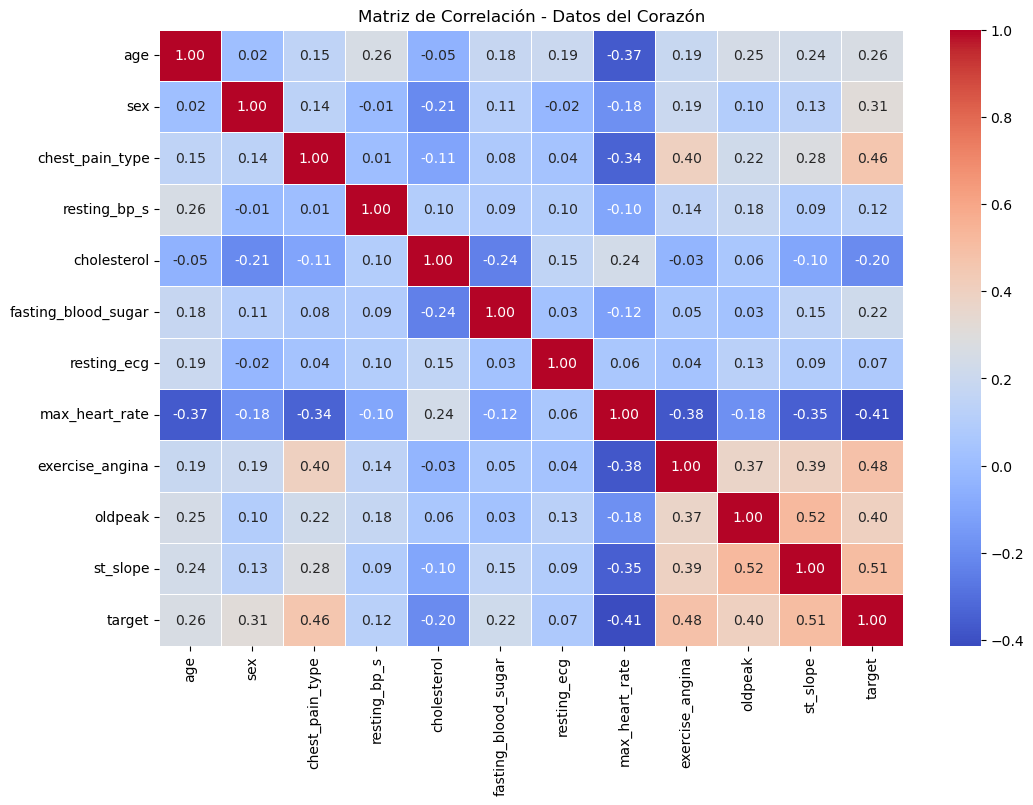

In [7]:
# Calcula la matriz de correlación
correlation_matrix = heart.corr()

# Crea el heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlación - Datos del Corazón')
plt.show()

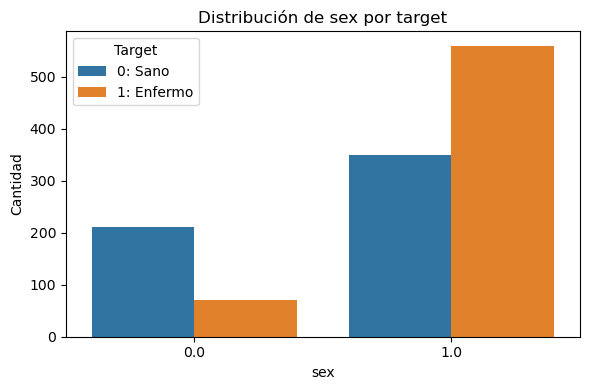

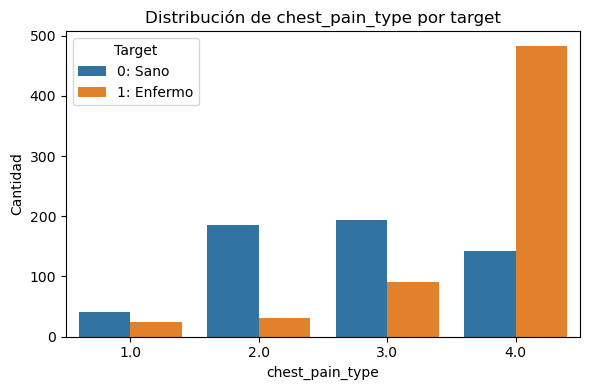

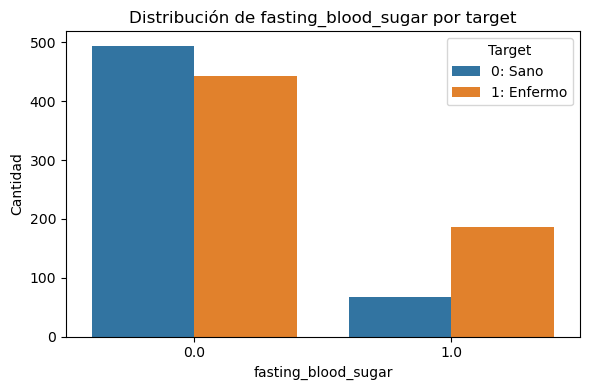

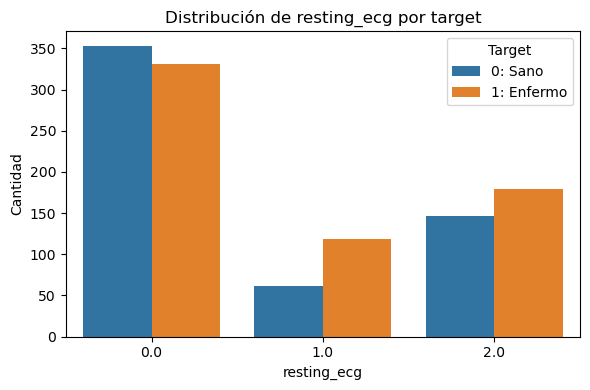

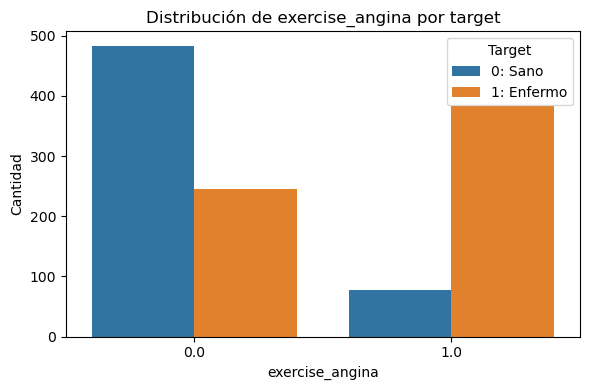

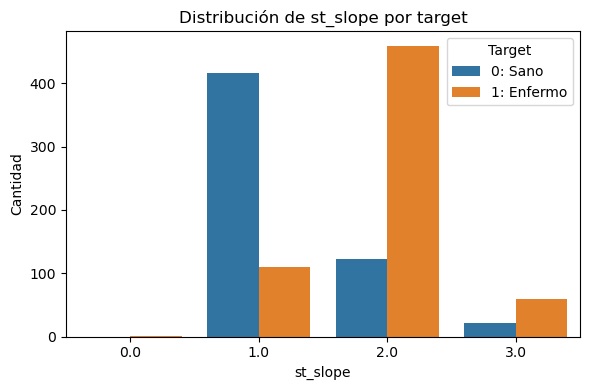

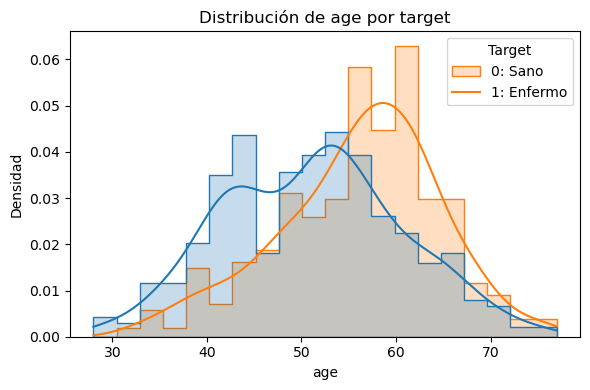

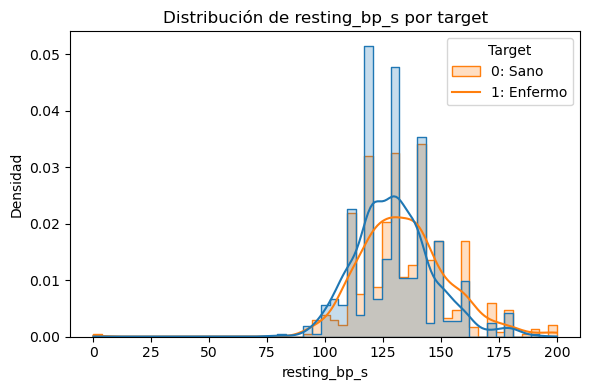

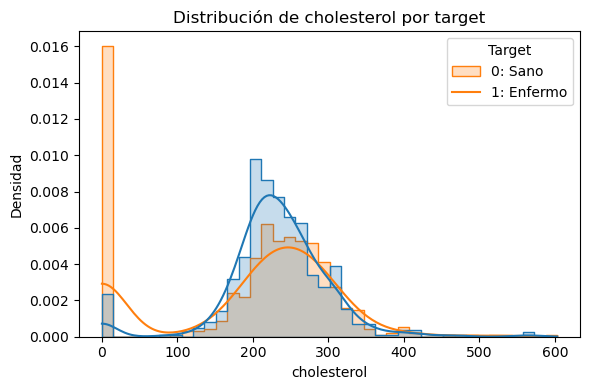

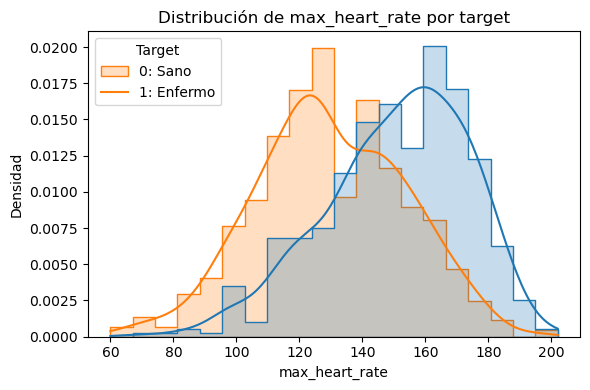

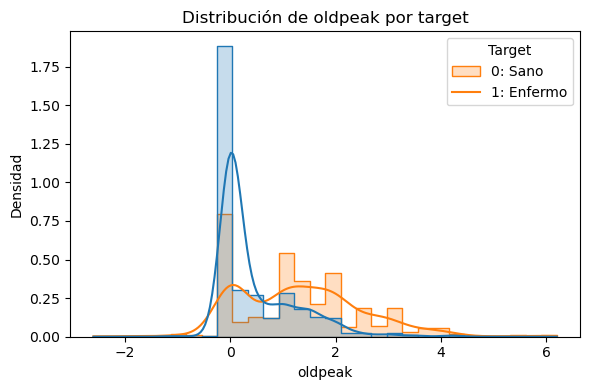

In [8]:
# Variables categóricas (gráficos de barras)
categorical_vars = ['sex', 'chest_pain_type', 'fasting_blood_sugar', 'resting_ecg', 'exercise_angina', 'st_slope']

# Variables numéricas (gráficos de distribución)
numerical_vars = ['age', 'resting_bp_s', 'cholesterol', 'max_heart_rate', 'oldpeak']

# Gráficos para variables categóricas
for var in categorical_vars:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=heart, x=var, hue='target')
    plt.title(f'Distribución de {var} por target')
    plt.xlabel(var)
    plt.ylabel('Cantidad')
    plt.legend(title='Target', labels=['0: Sano', '1: Enfermo'])
    plt.tight_layout()
    plt.show()

# Gráficos para variables numéricas
for var in numerical_vars:
    plt.figure(figsize=(6, 4))
    sns.histplot(data=heart, x=var, hue='target', kde=True, element='step', stat='density', common_norm=False)
    plt.title(f'Distribución de {var} por target')
    plt.xlabel(var)
    plt.ylabel('Densidad')
    plt.legend(title='Target', labels=['0: Sano', '1: Enfermo'])
    plt.tight_layout()
    plt.show()

In [14]:
heart['target'].value_counts()

target
1.0    629
0.0    561
Name: count, dtype: int64